### Data Manipulation with Pandas

Pandas is a package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are multi-dimensional arrays with attached row and column labels, often with heterogeneous types and/or missing data.

Pandas, and it's `Series` and `DataFrame` objects, builds on the NumPy array structure and provides efficient access to data cleaning tasks that occupy much of a data scientist's time.


#### Pandas Objects
There are 3 fundamental Pandas data structures:

#### Pandas Series Objects:

A Pandas `Series` is a one-dimensional array of indexed data.

In [1]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0]) # data should be homogeneous

In [2]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
type(data)

pandas.core.series.Series

As you can see above, the `Series` has a sequence of values as well as a sequence of indices

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
# assecising the elements in the series
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [7]:
data[2] 

0.75

In [8]:
data.shape

(4,)

In [9]:
data.ndim

1

In [10]:
data[1:3] # slicing

1    0.50
2    0.75
dtype: float64

#### Properties

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.01],index = ['a','b','c','d'])

In [12]:
data

a    0.25
b    0.50
c    0.75
d    1.01
dtype: float64

In [13]:
data['b'] # explisit indexing

0.5

In [14]:
data [2] #  implicit indexing

0.75

#### Series as specislized dictionary

Since you can use any data type as index, Pandas Series can be thought of as a specialized dictionary.

Let's construct a Series object directly from a Python dictionary.

In [15]:
population_dict = {'California':38, 
                   'Texas':26,
                   'New York':20,
                   'Florida':19,
                   'Illinois':13
                   }
pop_ser = pd.Series(population_dict)

In [16]:
pop_ser

California    38
Texas         26
New York      20
Florida       19
Illinois      13
dtype: int64

In [17]:
pop_ser['Texas'] # accessing value using index

26

In [18]:
population_dict['Texas']

26

In [19]:
pop_ser['Texas':'Florida'] 

Texas       26
New York    20
Florida     19
dtype: int64

 **Constructing Series Objects:**
 
Here are some example of constructing Series objects.

In [20]:
pd.Series([1,2,3]) # homogeneous number

0    1
1    2
2    3
dtype: int64

In [21]:
# data can be a scalar, which is repeated to fill the specified index
pd.Series(7,index=[10, 20, 30]) # note that duplicate indices are allowed

10    7
20    7
30    7
dtype: int64

In [22]:
# data can be a dictionary, in which index defaults to dictionary keys
pd.Series({2:'a',5:'b',3:'c'}, index = [3,2])

3    c
2    a
dtype: object

#### Pandas DataFrame Object

**DataFrame as a generalized NumPy Array**

Just like `Series` is an analog of a one dimensional array with flexible indices,

a `DataFrame` is an analog of two-dimensional array with both flexible row indices and flexible column indices.

In [23]:
population_dict = {'California':38, 
                   'Texas':26,
                   'New York':20,
                   'Florida':19,
                   'Illinois':13
                   }

In [24]:
area_dict = {'California':423, 'Texas':695,'New York':141 ,'Florida':170, 'Illinois':150}
# area in sand sq.miles

In [25]:
area_dict

{'California': 423,
 'Florida': 170,
 'Illinois': 150,
 'New York': 141,
 'Texas': 695}

We can use the Series area and population (we defined above) to create a single two-dimensional object.

In [26]:
states = pd.DataFrame({'Population': population_dict, 'Area':area_dict})

In [27]:
states

,Population,Area
California,38,423
Texas,26,695
New York,20,141
Florida,19,170
Illinois,13,150


In [28]:
type(states)

pandas.core.frame.DataFrame

In [29]:
states.ndim

2

In [30]:
states.shape

(5, 2)

As you can see, `states` is a DataFrame.

Like the Series object, DataFrame has an index attribute that gives access to the index labels.

In [31]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [32]:
states.values

array([[ 38, 423],
       [ 26, 695],
       [ 20, 141],
       [ 19, 170],
       [ 13, 150]])

Moreover, the DataFrame has a `columns` attribute, which is an `Index` object holding the column labels.

In [33]:
states.columns

Index(['Population', 'Area'], dtype='object')

Thus, the DataFrame can be thought of as a generalization of a 2-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

**DataFrame as specialized dictionary**

Just as a dictionary maps a key to a value, `DataFrame` maps a column name to a `Series` of column data.

In [34]:
states['Population'] # maps a column name to a Series of column data

California    38
Texas         26
New York      20
Florida       19
Illinois      13
Name: Population, dtype: int64

In [35]:
type(states['Population'])

pandas.core.series.Series

**Constructing DataFrame objects**

A DataFrame can be created in a number of ways.

In [36]:
area_dict

{'California': 423,
 'Florida': 170,
 'Illinois': 150,
 'New York': 141,
 'Texas': 695}

In [37]:
# single column DataFrame can be created from a single Series
area_df = pd.DataFrame({'Area':area_dict})

In [38]:
area_df

,Area
California,423
Florida,170
Illinois,150
New York,141
Texas,695


In [39]:
type(area_df)

pandas.core.frame.DataFrame

In [40]:
area_df.shape

(5, 1)

In [41]:
# from the list of dictionary.
data = [{'a':i ,'b':2*i} for i in range(6)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10


In [42]:
pd.DataFrame([{'a':2, 'b':5},{'b':7,'c':1}])

,a,b,c
0,2.0,5,NaN
1,NaN,7,1.0


**Creating DataFrame from two dimensional array.**

In [43]:
import numpy as np
df = pd.DataFrame(np.random.rand(3,2),columns = ['col1','col2'],index = ['a','b','c'])

In [44]:
df

,col1,col2
a,0.595487,0.241696
b,0.751653,0.190102
c,0.906041,0.460127


 **Creating DataFrame from structured array.**

In [45]:
pd.DataFrame(np.zeros(3,dtype = [('A','i8'),('B','f')]))

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


#### Pandas Index Object

The Pandas Index object can be thought of as an immutable array.

Let's construct an Index object from a list of integers.

In [46]:
import pandas as pd
ind = pd.Index([1,5,3,7])
ind

Int64Index([1, 5, 3, 7], dtype='int64')

**Index as immutable array**

The Index object operates like an array in many ways.

In [47]:
 # can use indexing notation to get values
 ind[0]

1

In [48]:
ind[-1]

7

In [49]:
# ind[2] = 5 # Its immutable

In [50]:
ind[::2] # slicing works

Int64Index([1, 3], dtype='int64')

In [51]:
print(ind.ndim,ind.max, ind.min, ind.size, ind.shape)

1 <bound method IndexOpsMixin.max of Int64Index([1, 5, 3, 7], dtype='int64')> <bound method IndexOpsMixin.min of Int64Index([1, 5, 3, 7], dtype='int64')> 4 (4,)


The only difference between Index objects and Numpy arrays are that Index objects are immutable.

ind[0] = 5 # error due to immutability (can not update values)

**Index as ordered set**

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.

Set unions, intersections, differences, and other combinations can be computed on Index objects.

In [52]:
indA = pd.Index ([1,3,8,4,9])
indB = pd.Index ([2,3,7,5,9])

In [53]:
indA & indB # intersection of IndA and IndB.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


Int64Index([3, 9], dtype='int64')

In [54]:
indA.intersection(indB)

Int64Index([3, 9], dtype='int64')

In [55]:
indA | indB # union

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')

In [56]:
indA.union(indB)

Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')

#### Data Indexing and Selection 
We have seen the method and tools to access, set, and modify values in NumPy Arrays, for example, indexing, slicing, masking, fancy indexing etc.

Here we will see similar means of accessing and modifying values in Pandas `DataFrame` objects.

##### Data Selection in Series
The `Series` object is in many ways like a one-dimensional NumPy Array, and in many ways like a standard Python dictionary.

**Series as a Dictionary**

Just like a dictionary, the `Series` object provides a mapping from a collection of keys to a collection of values.

In [57]:
import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0], index = ['a','b','c','d'])

In [58]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values.

In [59]:
 'd' in data # checking keys

True

In [60]:
'r' in data 

False

In [61]:
data.keys() # keys => indices 

Index(['a', 'b', 'c', 'd'], dtype='object')

In [62]:
data.items # get all items

<bound method Series.items of a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64>

In [63]:
data.items() # gives zip 

In [64]:
list(data.items()) # cast using list 

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [65]:
tuple(data.items())

(('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0))

`Series` objects can be modified with a dictionary-like syntax.

Just as a dictionary can be extended by assigning a new key, a `Series` can be extended by assigning to a new index value.

In [66]:
data 

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [67]:
data['c'] = 99 # updated like dictionary

In [68]:
data

a     0.25
b     0.50
c    99.00
d     1.00
dtype: float64

**Series as a one-dimensional array**

A `Series` provides array-style item selection with the same basic mechanisms as NumPy arrays, e.g. slices, masks, fancy indexing etc.

In [69]:
data[:'c'] # slicing by explisit indexing

a     0.25
b     0.50
c    99.00
dtype: float64

In [70]:
data > 2.5

a    False
b    False
c     True
d    False
dtype: bool

In [71]:
data

a     0.25
b     0.50
c    99.00
d     1.00
dtype: float64

In [72]:
# masking
data[ (data >= 0.5) &(data <=1) ] # get data between 0.4 and 1.0

b    0.5
d    1.0
dtype: float64

In [73]:
# fancy indexing
data[['b','d']]

b    0.5
d    1.0
dtype: float64

In [74]:
type(data[['b','c']])

pandas.core.series.Series

 ##### Indexers: `loc` and `iloc`
Pandas provides special `indexer` attributes that explicitly expose certain indexing schemes.

The `loc` attribute allows indexing and slicing that always references the explicit index.

In [75]:
data = pd.Series(['x','y','z'], index = [1,3,5])

In [76]:
data

1    x
3    y
5    z
dtype: object

In [77]:
data.iloc[1] # using explicit indexing using loc

'y'

In [78]:
data.loc[1]

'x'

In [79]:
data.loc[1:3] # explicit slicing

1    x
3    y
dtype: object

By contrast, iloc is used for referencing by implicit index.

In [80]:
data.iloc[1:3] # implicit slicing

3    y
5    z
dtype: object

Explicit is always better than implicit. So it is better to use `loc` and `iloc` to make explicit which indexing is intended.

#### Data Selection in DataFrame

DataFrame acts in many ways as:

* a two-dimensional or structured array
* or, a dictionary of Series sharing the same index

**DataFrame as a dictionary**

Let's see how DataFrame is analogous to dictionary.

In [81]:
area = pd.Series({'California':424,'Texas':69, 'New York':141,'Florida':176, 'Illinois':150})

In [82]:
population = pd.Series({'California':38, 'Texas':26, 'New York':19,'Florida':20,'Illinois':129})

In [83]:
data = pd.DataFrame({'Area':area,'Population':population })

In [84]:
data

,Area,Population
California,424,38
Texas,69,26
New York,141,19
Florida,176,20
Illinois,150,129


The individual `Series` that make up the columns of the DataFrame can be accessed using dictionary style indexing of the column name.

In [85]:
data['Area']

California    424
Texas          69
New York      141
Florida       176
Illinois      150
Name: Area, dtype: int64

In [86]:
data['Population']

California     38
Texas          26
New York       19
Florida        20
Illinois      129
Name: Population, dtype: int64

In [87]:
type(data['Population'])

pandas.core.series.Series

In [88]:
# for string column names, attribute-style access can be used
data.Area

California    424
Texas          69
New York      141
Florida       176
Illinois      150
Name: Area, dtype: int64

In [89]:
data.Population

California     38
Texas          26
New York       19
Florida        20
Illinois      129
Name: Population, dtype: int64

This dictionary-style syntax can also be used to modify the object, e.g. to add a new column.

In [91]:
# adding a new column 'density'
data['Density']= data['Population']/data['Area']

In [92]:
data['Density']

California    0.089623
Texas         0.376812
New York      0.134752
Florida       0.113636
Illinois      0.860000
Name: Density, dtype: float64

**DataFrame as a 2-dimensional array**

`DataFrame` can also be viewed as a two-dimensional array.

In [93]:
data.values # 2-d array

array([[4.24000000e+02, 3.80000000e+01, 8.96226415e-02],
       [6.90000000e+01, 2.60000000e+01, 3.76811594e-01],
       [1.41000000e+02, 1.90000000e+01, 1.34751773e-01],
       [1.76000000e+02, 2.00000000e+01, 1.13636364e-01],
       [1.50000000e+02, 1.29000000e+02, 8.60000000e-01]])

When we view `DataFrame` as a 2-dim array, we can do many array-like operations on the `DataFrame`. For example, we can transpose the `DataFrame`.

In [94]:
data.T # transpose 

,California,Texas,New York,Florida,Illinois
Area,424.000000,69.000000,141.000000,176.000000,150.00
Population,38.000000,26.000000,19.000000,20.000000,129.00
Density,0.089623,0.376812,0.134752,0.113636,0.86


In [95]:
data.values

array([[4.24000000e+02, 3.80000000e+01, 8.96226415e-02],
       [6.90000000e+01, 2.60000000e+01, 3.76811594e-01],
       [1.41000000e+02, 1.90000000e+01, 1.34751773e-01],
       [1.76000000e+02, 2.00000000e+01, 1.13636364e-01],
       [1.50000000e+02, 1.29000000e+02, 8.60000000e-01]])

The dictionary-style indexing of columns does not allow to simply treat it as a NumPy array. For example, passing a single index to an array accesses a row.

In [96]:
data.values[1] # return the second row of the array

array([69.        , 26.        ,  0.37681159])

For array-style indexing, Pandas uses `loc`, `iloc`, and `ix` indexers.

Using the `iloc` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit index), but the `DataFrame` index and columns labels are maintained in the result.

In [97]:
 # implicit indexing
data.iloc[2:4,1:] # rows 0, 1, 2 and cols 0, 1

,Population,Density
New York,19,0.134752
Florida,20,0.113636


In [98]:
# explicit indexing 
data.loc[:'New York',:'Population'] # rows upto 'New York'; cols up to 'population'

,Area,Population
California,424,38
Texas,69,26
New York,141,19


In [99]:
data

,Area,Population,Density
California,424,38,0.089623
Texas,69,26,0.376812
New York,141,19,0.134752
Florida,176,20,0.113636
Illinois,150,129,0.860000


In [100]:
# select rows with density > 0.1 (masking); cols => 'population', 'density' (fancy indexing)
data.loc[data.Density > 0.1]

,Area,Population,Density
Texas,69,26,0.376812
New York,141,19,0.134752
Florida,176,20,0.113636
Illinois,150,129,0.860000


In [101]:
data.Density > 0.1

California    False
Texas          True
New York       True
Florida        True
Illinois       True
Name: Density, dtype: bool

In [102]:
data.loc[data.Density > 0.1,['Area','Population']]

,Area,Population
Texas,69,26
New York,141,19
Florida,176,20
Illinois,150,129


In [103]:
data

,Area,Population,Density
California,424,38,0.089623
Texas,69,26,0.376812
New York,141,19,0.134752
Florida,176,20,0.113636
Illinois,150,129,0.860000


Any of the indexing conventions can be used to set or update values.

In [104]:
# update 
data.iloc[3,1] = 99

In [105]:
data

,Area,Population,Density
California,424,38,0.089623
Texas,69,26,0.376812
New York,141,19,0.134752
Florida,176,99,0.113636
Illinois,150,129,0.860000


While indexing refers to columns, slicing refers to rows.

In [106]:
data.loc['California','Area']=500

In [107]:
data

,Area,Population,Density
California,500,38,0.089623
Texas,69,26,0.376812
New York,141,19,0.134752
Florida,176,99,0.113636
Illinois,150,129,0.860000


#### Opertating on Data in Pandas

##### Ufuncs: Index Preservation
Any NumPy ufuncs works on Pandas `Series` and `DataFrame` objects.

In [108]:
import pandas as pd
import numpy as np
rng= np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4)) # Series
ser

0    6
1    3
2    7
3    4
dtype: int64

In [109]:
data = pd.DataFrame(rng.randint(0,10,(3,4)),columns = ['A','B','C','D'])

In [110]:
data

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of the objects defined above, we will get another Pandas object with the indices preserved.

In [111]:
np.exp(ser) # indices is preserved 

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [112]:
# a bit more complex calculation
np.sin(data * np.pi/4) # sine of each element multipled by pi/4

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


#### UFuncs: Index Alignment
For binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operations.

###### UFuncs: Index Alignment
For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operations.

* **Index alignment in Series**

Suppose we are combining two different data sources such as the following.


In [113]:
area = pd.Series({'Alaska':172, 'Texas':696 , 'California':424},name = 'Area')

In [114]:
population = pd.Series({'California':38, 'Texas':696, 'New York':19}, name = 'Population')

In [115]:
area

Alaska        172
Texas         696
California    424
Name: Area, dtype: int64

In [116]:
population 

California     38
Texas         696
New York       19
Name: Population, dtype: int64

Let's compute the population density.

In [117]:
population/area # indices preserve

Alaska             NaN
California    0.089623
New York           NaN
Texas         1.000000
dtype: float64

As you can see, we get a `NaN` (Not a Number) for rows in which either of population or area value is missing.

Another example:

In [118]:
A = pd.Series([2,4,7], index = [0,1,2])
B = pd.Series([8,3,1], index = [1,2,3])

In [119]:
A 

0    2
1    4
2    7
dtype: int64

In [120]:
B

1    8
2    3
3    1
dtype: int64

If we do not want NaN, then we can modify the fill value using appropriate object methods in place of operators.

For example, calling `A.add(B)` is equivalent to `A + B`, but allows optional explicit specification of the fill value to replace the missing values with.

In [121]:
A + B # index preserved 

0     NaN
1    12.0
2    10.0
3     NaN
dtype: float64

In [122]:
A.add(B,fill_value = 99) # NaN is replaced by 99

0    101.0
1     12.0
2     10.0
3    100.0
dtype: float64

* **Index alignment in DataFrame**
A similar type of alignment takes place for both columns and indices, when performing operations on `DataFrames`.



In [123]:
A = pd.DataFrame(rng.randint(0,20,(2,2)),columns = list ('AB')) 

In [124]:
A

,A,B
0,1,11
1,5,1


In [125]:
B = pd.DataFrame(rng.randint(0,10,(3,3)), columns = list('BAC'))

In [126]:
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [127]:
A + B  # element-wise addition with NaN for missing values

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


As can be seen above, the indices and columns are aligned properly, and the indices are sorted.

Just like with the `Series`, we can use the associated object's arithmetic method and pass any desired `fill_value` to be used in place of missing entries.

In [128]:
A.add(B, fill_value = 0)

,A,B,C
0,1.0,15.0,9.0
1,13.0,6.0,0.0
2,2.0,9.0,6.0


In [129]:
A.mul(B,fill_value = 1)

,A,B,C
0,0.0,44.0,9.0
1,40.0,5.0,0.0
2,2.0,9.0,6.0


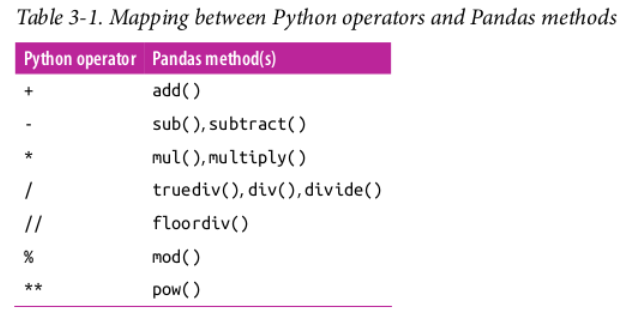

##### Ufuncs: Operations Between DataFrame and Series:

When performing operations between a `DataFrame` and a `Series`, the index and column alignments are similarly maintained.

Operations between a `DataFrame` and a `Series` are similar to operations between a two-dimensional and one-dimensional NumPy array.

In [130]:
A = np.random.randint(10,size=(3,4))

In [131]:
A

array([[7, 3, 1, 0],
       [2, 5, 8, 4],
       [1, 0, 3, 0]])

In [132]:
A[1]

array([2, 5, 8, 4])

In [133]:
A - A[1] # broadcasting

array([[ 5, -2, -7, -4],
       [ 0,  0,  0,  0],
       [-1, -5, -5, -4]])

In [134]:
A[0]

array([7, 3, 1, 0])

In [135]:
A - A[0] # broadcasting 

array([[ 0,  0,  0,  0],
       [-5,  2,  7,  4],
       [-6, -3,  2,  0]])

Let's see how the same operation works with DataFrame.

In [136]:
df = pd.DataFrame(A, columns= list('QRST'))

In [137]:
df

,Q,R,S,T
0,7,3,1,0
1,2,5,8,4
2,1,0,3,0


In [138]:
# dataframe - series
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-5,2,7,4
2,-6,-3,2,0


In [139]:
df

,Q,R,S,T
0,7,3,1,0
1,2,5,8,4
2,1,0,3,0


If you want column-wise operation, you can use the object methods with axis specified.

In [140]:
df.sub(df['Q'],axis = 0)

,Q,R,S,T
0,0,-4,-6,-7
1,0,3,6,2
2,0,-1,2,-1


The preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context.

#### Handling Missing Data 
Real world data is rarely clean and homogeneous. Many of real world data have some amount of missing values.

**Missing Data in Pandas**

Pandas uses sentinels for missing data, and uses two Python null values:

* the special floating-point NaN value
* the Python `None` object


**None: Pythonic missing data**

The first sentinel value Pandas uses is `None`. As `None` is a Python object, it can not be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object' - that is arrays of Python objects.

In [141]:
import numpy as np
import pandas as pd

In [142]:
vals1 = np.array([1,None,3,4])

In [143]:
vals1

array([1, None, 3, 4], dtype=object)

**NaN Missing Numerical data**

The other missing data representation is NaN, which is a special floating point value.

In [144]:
vals2 = np.array([1,np.nan,3,4])

In [145]:
vals2 

array([ 1., nan,  3.,  4.])

In [146]:
type(np.nan)

float

In [147]:
vals2.dtype  # all items are upcasted to float 

dtype('float64')

`NaN` is like a data virus, which infects any other object it interacts with. Regardless of the operation, the result of arithmetic with `NaN` will be another `NaN`

In [148]:
1 + np.nan # act as data virus 

nan

In [149]:
4 / np.nan

nan

In [150]:
vals2

array([ 1., nan,  3.,  4.])

In [151]:
# aggregates over values involving NaN
np.sum(vals2)

nan

NumPy provides some special aggregations that ignore missing values.

In [152]:
np.nansum(vals2)

8.0

In [153]:
np.nanmean(vals2)

2.6666666666666665

In [154]:
np.mean (vals2)

nan

In [155]:
np.median(vals2)

nan

 **`NaN` and `None` in Pandas**

Pandas can handle `NaN` and `None` nearly interchangeably, converting between them where appropriate.

In [156]:
aa = pd.Series([1,2,np.nan,4,None])

In [157]:
aa

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [158]:
aa.dtype # None object is upcasted to NaN 

dtype('float64')

For types that don't have available sentinel value, Pandas automatically type-casts when NA values are present.

For example, if we set a value in an integer array to `np.nan`, it will automatically be upcast to a floating-point type to accommodate the NA.

In [159]:
x = pd.Series(range(4),dtype = int)

In [160]:
x

0    0
1    1
2    2
3    3
dtype: int64

In [161]:
x[1] = np.nan

In [162]:
x # all values are upcasted to float.

0    0.0
1    NaN
2    2.0
3    3.0
dtype: float64

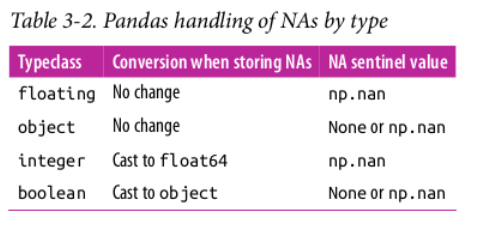

#### Operating on Null values

**Detecting Null values** 

In [163]:
data = pd.Series([1,np.nan,'hello',None])

In [164]:
data 

0        1
1      NaN
2    hello
3     None
dtype: object

In [165]:
data.isnull() # retrun the boolean mask of the data

0    False
1     True
2    False
3     True
dtype: bool

In [166]:
data[data.isnull()]

1     NaN
3    None
dtype: object

In [167]:
data.notnull() # Boolean mask returned by notnull() in Series index

0     True
1    False
2     True
3    False
dtype: bool

In [168]:
data[data.notnull()] # fancy indexing

0        1
2    hello
dtype: object

The `isnull()` and `notnull()` methods produce similar Boolean results for DataFrames.

 **Dropping Null Values**

In [169]:
data 

0        1
1      NaN
2    hello
3     None
dtype: object

In [170]:
data.dropna() # removes the NA values

0        1
2    hello
dtype: object

In [171]:
df = pd.DataFrame([[1, np.nan, 2],[2, 3, 5],[np.nan, 4, 6]])

In [172]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [173]:
df.dropna() # drops all rows with NA

,0,1,2
1,2.0,3.0,5


In [174]:
df.dropna(axis=1) # drops column

,2
0,2
1,5
2,6


In [175]:
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


In [176]:
df[3] = np.nan # subset columns

In [177]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [178]:
df.dropna(axis = 1, how = 'all') # renoves the column with all nan values

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [179]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [180]:
df.dropna(thresh = 3) # keep only rows with a minimum of 3 non-null values

,0,1,2,3
1,2.0,3.0,5,NaN


In [181]:
df.dropna(axis = 1 ,thresh = 2)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


**Filling Null values** 
Pandas provides the `fillna()` method that returns a copy of the array with the null values replaced.

In [182]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))

In [183]:
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [184]:
# fill NA entries with a single value, e.g. zero
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [185]:
data.fillna(99)

a     1.0
b    99.0
c     2.0
d    99.0
e     3.0
dtype: float64

 specify a forward-fill to propagate the previous value forward

In [186]:
data.fillna(method = 'ffill') # fill NaN with forward value.

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [187]:
# specify a back-fill to propagate the next values forward
df.fillna(method ='ffill', axis = 0) #

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


For `DataFrames`, the options are similar, but we can also specify the axis along which the fills take place.

In [188]:
df.fillna(method = 'bfill',axis=1) # column

,0,1,2,3
0,1.0,2.0,2.0,NaN
1,2.0,3.0,5.0,NaN
2,4.0,4.0,6.0,NaN


Back Fill

In [189]:
data.fillna(method = 'bfill') # fill NaN with back value.

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [190]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [191]:
df.fillna(method = 'ffill',axis = 0) # column

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [192]:
df.fillna(method = 'bfill', axis = 1) # rows

,0,1,2,3
0,1.0,2.0,2.0,NaN
1,2.0,3.0,5.0,NaN
2,4.0,4.0,6.0,NaN


In [193]:
df.fillna(method = 'ffill',axis = 'rows')

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [194]:
df.fillna( method = 'bfill',axis = 'rows')

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


### Combining Datasets: Merge and Join
Pandas has high-performance in-memory join and merge operations.

 **One-to-One**

In [195]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'], 'group':['Accounting','Engineering','Engineering','HR']})
df2 = pd.DataFrame({'employee':['Lisa','Bob','Jake','Sue'], 'hire_date':[2004,2008,2011,2009]})

In [196]:
print(df1); print('-'*20); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2011
3      Sue       2009


To combine the above two dataframes, we can use the `pd.merge()` function.

In [197]:
df3 = pd.merge(df1,df2)
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


 **Many-to- One**

Many-to-one joins are joins in which one of the two key columns contains duplicate entries. The resulting DataFrame will preserve those duplicate entries as appropriate.

In [198]:
df4 = pd.DataFrame({'group':['Accounting','Engineering','HR'], 'supervisor':['Carly','Guido','Steve']})

In [199]:
print(df3); print('-'*40); print(df4)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2011
2     Lisa  Engineering       2004
3      Sue           HR       2009
----------------------------------------
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [200]:
pd.merge(df3,df4)


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2011,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2009,Steve


In [201]:
pd.merge(df4,df3)

,group,supervisor,employee,hire_date
0,Accounting,Carly,Bob,2008
1,Engineering,Guido,Jake,2011
2,Engineering,Guido,Lisa,2004
3,HR,Steve,Sue,2009


 **Many-to- Many**

If the key column in both the left and right array contains duplicates, the the result is a many-to-many merge.

In [202]:
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],'group':['Accounting','Engineering','Engineering','HR']})

In [203]:
df5 = pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR','HR'],'skills':['math','spreedsheets','coding','linux','spreedsheets','organization']})

In [204]:
print(df1); print('-'*30), print(df5)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
------------------------------
         group        skills
0   Accounting          math
1   Accounting  spreedsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreedsheets
5           HR  organization


(None, None)

In [205]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreedsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreedsheets
7,Sue,HR,organization


##### Spicification of the Merge key 

In [206]:
print(df1); print('-'*20); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2011
3      Sue       2009


In [207]:
pd.merge(df1,df2, on= 'employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2011
2,Lisa,Engineering,2004
3,Sue,HR,2009


This option works only if both the left and the right DataFrames have the specified column name.

###### The left_on and right_on keyword
Sometimes you may want to merge two DataFrames on column name/s with different names in the right and the left DataFrame.

For instance, you may have 'name' as employee name in one DF and 'employee' on the other.

Let's see how we can join on those columns.

In [208]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]
                    })

print(df1); print('-'*20); print(df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [209]:
# joining on 'employee' and 'name'
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


We can drop the redundant column as shown below.

In [210]:
# 'name' column dropped
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


**The left_index and right_index keywords**
You can also merge on an index rather than a column.

In [211]:
df1a = df1.set_index('employee') # setting the 'employee' column as explicit index on df1
df2a = df1.set_index('employee')  #setting the 'employee' column as explicit index on df2

In [212]:
print(df1a);print('-'*20); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
--------------------
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR


In [213]:
pd.merge(df1a, df2a, left_on = 'employee', right_on = 'employee')


,group_x,group_y
employee,,
Bob,Accounting,Accounting
Jake,Engineering,Engineering
Lisa,Engineering,Engineering
Sue,HR,HR


In [214]:
pd.merge(df1a,df2a, left_index = True, right_index = True )

,group_x,group_y
employee,,
Bob,Accounting,Accounting
Jake,Engineering,Engineering
Lisa,Engineering,Engineering
Sue,HR,HR


The `join()` method performs a merge that defaults to joining on indices.

In [216]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [217]:
df2a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


##### Specifying Set Arithmetic for joins 
Sometimes there are cases where a value appears in one key column and not on the other.

In [218]:
df6 = pd.DataFrame({'name':['Peters','Paul','Mary'], 
                    'food':['fish','beans','bread']},
                   columns=['name', 'food'])

df7 = pd.DataFrame({'name':['Mary','Josheph'],
                    'drink':['wine','beer',]},
                   columns=['name', 'drink'])

In [219]:
print(df6); print('-'*20); print(df7)

     name   food
0  Peters   fish
1    Paul  beans
2    Mary  bread
--------------------
      name drink
0     Mary  wine
1  Josheph  beer


In [220]:
pd.merge(df6,df7) # Inner join

,name,food,drink
0,Mary,bread,wine


In the above case, the result contains the intersection of the two sets of inputs, which is known as inner join.

In [221]:
pd.merge(df6,df7, how = 'inner') # explicit inner join

,name,food,drink
0,Mary,bread,wine


The other options are:

* outer
* left
* right

An outer join returns a join over the union of the input columns, and fills in all missing values with NA's.

The left join returns a join over the left entries.

In [222]:
pd.merge(df6,df7, how = 'left') # left join

,name,food,drink
0,Peters,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


The right join returns a join over the right entries.

In [223]:
pd.merge(df6,df7, how = 'right')

,name,food,drink
0,Mary,bread,wine
1,Josheph,NaN,beer


In [224]:
pd.merge(df6,df7,how = 'outer')

,name,food,drink
0,Peters,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Josheph,NaN,beer


#### Overlapping colomns Names: The suffixes Keyword 
There may be cases where the two input DataFrames have conflicting column names.

In [225]:
df8 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'rank':[1,2,3,4]})

In [226]:
df9 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                   'rank':[3,1,4,2]})

In [227]:
print(df8); print('-'*20); print(df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
--------------------
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


In [228]:
pd.merge(df8, df9)

,name,rank


In [229]:
pd.merge(df8,df9,on = 'name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [230]:
pd.merge(df8,df9, on='rank')

,name_x,rank,name_y
0,Bob,1,Jake
1,Jake,2,Sue
2,Lisa,3,Bob
3,Sue,4,Lisa


If these defaults are not appropriate, then it is possible to specify a custom suffix using the `suffixes` keyword.

In [231]:
pd.merge(df9,df9, on='rank',suffixes=['_left','_right'])

,name_left,rank,name_right
0,Bob,3,Bob
1,Jake,1,Jake
2,Lisa,4,Lisa
3,Sue,2,Sue


#### Simple Aggregation in Pandas 
We can do efficient summarization, such as computing aggregations (`sum()`, `mean(`), `median()` etc) in which a single number gives insight into the nature of a large dataset.

In [232]:
import numpy as np 
import pandas as pd
rng = np.random.RandomState(42)
# series 
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [233]:
ser.mean() # mean

0.5623850983416314

In [234]:
np.mean(ser)

0.5623850983416314

In [235]:
ser.median() # median

0.5986584841970366

In [236]:
ser.sum() # sum

2.811925491708157

For dataframe,by default the aggregaes return results within each column.

In [237]:
# DataFrame 
df = pd.DataFrame({'A':rng.rand(5),'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [238]:
df.sum()

A    2.389442
B    2.217101
dtype: float64

In [239]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [240]:
df.median()

A    0.601115
B    0.212339
dtype: float64

In [241]:
df.max()

A    0.866176
B    0.969910
dtype: float64

In [242]:
df.describe() # decsribe the data 

,A,B
count,5.000000,5.000000
mean,0.477888,0.443420
std,0.353125,0.426952
min,0.058084,0.020584
25%,0.155995,0.181825
50%,0.601115,0.212339
75%,0.708073,0.832443
max,0.866176,0.969910


In [243]:
df.sum(axis = 1) # Row wise sum

0    0.176579
1    1.027993
2    1.698619
3    0.813454
4    0.889898
dtype: float64

In [244]:
df.sum(axis = 0) # column wise sum.

A    2.389442
B    2.217101
dtype: float64

In [245]:
df.count() # Total numbers of items

A    5
B    5
dtype: int64

In [246]:
df.std() # standard deviation

A    0.353125
B    0.426952
dtype: float64

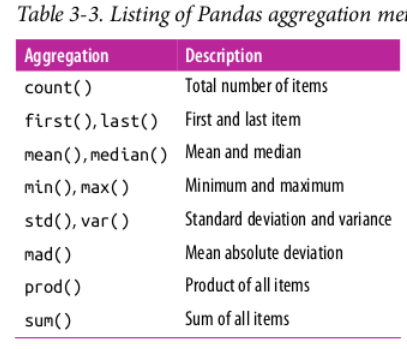

#### GroupBy : `Split`,`Combine`,`Apply`
The next level of data summarization is the groupby operation which allows to quickly and efficiently compute aggregates on subsets of data.

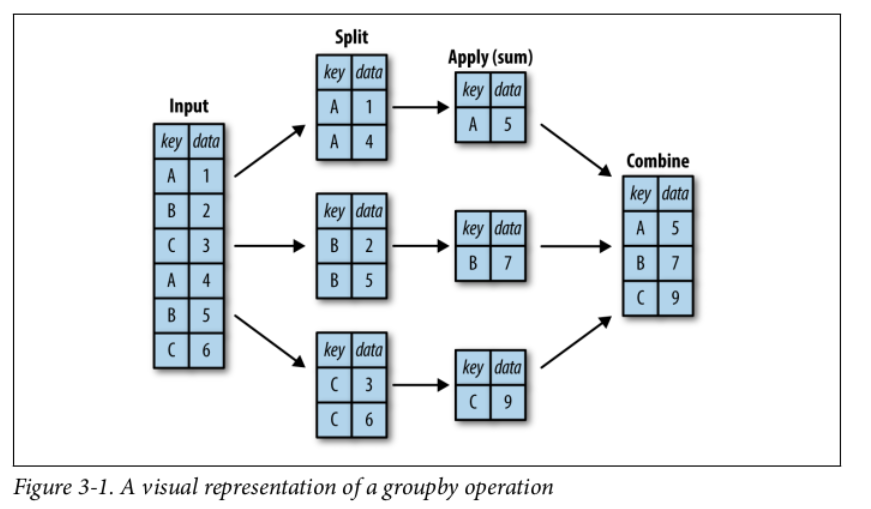

As seen in the above figure,

* The split step breaks up and groups a DataFrame depending on the value of the specified key.
* The apply step involves computing some function (usually an aggregate, transformation, or filtering) within the individual groups.
* The combine step merges the results of these individual operations into an output array.

Let's look at an example.

In [247]:
df=pd.DataFrame({'key':['A','B','C','A','B','C'],
                'data': range(6)}, columns=['key','data'])

In [248]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


We can compute the most basic **split-apply-combine** operation with the `groupby()` method of DataFrames, by passing the name of the desired key column.

In [249]:
df_groupby= df.groupby('key')

In [250]:
df_groupby

In [251]:
type(df_groupby)

pandas.core.groupby.generic.DataFrameGroupBy

Note that what is returned is a `DataFrameGroupBy` object. It can be considered as a special view of the `DataFrame`, which does no actual computation until the aggregation is applied. This `"lazy evaluation"` approach means that aggregates can be implemented very efficiently.

In [252]:
df_groupby.sum()

,data
key,
A,3
B,5
C,7


In [253]:
df_groupby.mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [254]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


data    2.5
dtype: float64

You can apply virtually any common Pandas or NumPy aggregation function like you saw above.

#### Aagregate, Filter, Transform, Apply

In [255]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                  'data1': range(6),
                  'data2': rng.randint(0,10,6)}, 
                  columns = ['key','data1','data2'])

In [256]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**Aggregation**
We have seen aggregations with `sum()`, `median()`, and the like, but `aggregate()` method allows for even more flexibility.

It can take a function, or a list thereof, and compute all the aggregates at once.

In [257]:
df.groupby('key').aggregate([max, min, np.mean])

data1          data2         
      max min mean   max min mean
key                              
A       3   0  1.5     5   3  4.0
B       4   1  2.5     7   0  3.5
C       5   2  3.5     9   3  6.0

Another useful pattern is that we can pass a dictionary mapping column names to operations to be applied on that column.

In [258]:
df.groupby('key').aggregate({'data1': sum ,'data2': min})

,data1,data2
key,,
A,3,3
B,5,0
C,7,3


**Filtering** 

Filtering allows to drop data based on the group properties.

For example, we want to keep all the groups that have the standard deviation larger than some critical value, then we can write the following code.

In [259]:
def filter_func(x):
    return x['data2'].std()> 4

In [260]:
filter_func(df)

False

Passing filter_func in filter.

In [261]:
def filter_func (x):
  return x['data2'].std()> 4

print(df)
print(20*'-')
print(df.groupby('key').std())
print(20*'-')
print(df.groupby('key').filter(filter_func))


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
--------------------
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
--------------------
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In the above result, key A does not have standard deviation greater than 4, so it is not included (last table).

#### Transformation

While aggregation returns a reduced version of the data, transformation can return some transformed version of the full data to recombine.

For such transformation, the output is the same shape as the input.

As example is to center the data by subtracting the group-wise mean.

Transforming the data by data - `data.mean()`

In [262]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [263]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### Apply() Method 
The apply() function which normalizes the first column by the first column by the sum of the second.

In [264]:
def norm_by_data2(x):
  x['data1'] /= x['data2'].sum()
  return x
print(df)
print(20*'-')
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
--------------------
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


`apply()` within a `GroupBy` is very flexible: the only criterion is that the function takes a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to you.

### Working with Time Series Data:
Pandas has extensive set of tools for working with dates, times, and time-indexed data.

Date and time data comes in a few flavors.

* **Time stamps:** reference particular moments in time (for example - June 14, 2009 at 6:25 PM).
* **Time intervals and periods:** reference a length of time between a particular beginning and end point, for example - the year 2020. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g. 24 hour-long periods constituting days).
* **Time deltas or durations:** reference an exact length of time (e.g. a duration of 26.65 seconds)



##### Dates and Times in Python
Python has a number of available representations of `dates`, `times`, `deltas`, and `timestamps`.

**Native Python dates and times: datetime and dateutil**
Python's basic objects for working with dates and times reside in the built-in `datetime` module.



In [265]:
from datetime import datetime 
# manually build a date using datetime
datetime(year=2012,month = 10, day = 31)

datetime.datetime(2012, 10, 31, 0, 0)

In [266]:
today = datetime(year = 2021, month = 10 , day=28)

In [267]:
type(today)

datetime.datetime

Using the dateutil mode, you can parse dates from a variety of string format.

In [268]:
from dateutil import parser
parser.parse('2nd of July 2029')

datetime.datetime(2029, 7, 2, 0, 0)

In [269]:
parser.parse('22 june 2021')

datetime.datetime(2021, 6, 22, 0, 0)

In [270]:
parser.parse('10/05/1999')

datetime.datetime(1999, 10, 5, 0, 0)

In [271]:
date = parser.parse('2015-9-21')

In [272]:
type(parser.parse('10/05/1999')) # datetime object

datetime.datetime

Once we have the datetime object, we can do things such as printing the day of the week.

In [273]:
date.strftime('%A')

'Monday'

In [274]:
date.strftime('%B')

'September'

In [275]:
date.strftime('%C') # century

'20'

In [276]:
date.strftime('%D')

'09/21/15'

In [277]:
date.strftime('%F')

'2015-09-21'

In [278]:
date.strftime('%G')

'2015'

Just as Python lists are suboptimal compared to NumPy arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

**Typed arrays of times: Numpy's datetime64**

The `datetime64` dtype encodes the dates as 64- bit integers, and thus allows ararys of dates to be represented very compactly.

In [279]:
import numpy as np 
date_np = np.array('2021-04-18', dtype = 'datetime64')

In [280]:
date_np

array('2021-04-18', dtype='datetime64[D]')

In [281]:
date_np + 7 # add 7 days

numpy.datetime64('2021-04-25')

Once we have the date formatted like above, we can do vectorized operations on it.

In [282]:
date_np + np.arange(7)

array(['2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
       '2021-04-22', '2021-04-23', '2021-04-24'], dtype='datetime64[D]')

**Dates and times in Pandas: Best of both words.**

Pandas provides a `Timestamp` object, which combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.daatime64.`

From a group of these `Timestamps` objects, Pandas can construct a `DateTimeIndex` that can be used to index data in a `Series`or `DataFrame`

In [283]:
import pandas as pd
date_pd = pd.to_datetime('2nd july 2012')

In [284]:
date_pd

Timestamp('2012-07-02 00:00:00')

In [285]:
date_pd.strftime('%A')

'Monday'

In [286]:
type(date_pd)

pandas._libs.tslibs.timestamps.Timestamp

We can perform Numpy-style vectorized operations directly on this object.

In [287]:
date_pd + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2012-07-02', '2012-07-03', '2012-07-04', '2012-07-05',
               '2012-07-06', '2012-07-07', '2012-07-08', '2012-07-09',
               '2012-07-10', '2012-07-11', '2012-07-12', '2012-07-13'],
              dtype='datetime64[ns]', freq=None)

In [288]:
date_pd + pd.to_timedelta(np.arange(4), 'w')

DatetimeIndex(['2012-07-02', '2012-07-09', '2012-07-16', '2012-07-23'], dtype='datetime64[ns]', freq=None)

In [289]:
date_pd + pd.to_timedelta(np.arange(10), 'H')

DatetimeIndex(['2012-07-02 00:00:00', '2012-07-02 01:00:00',
               '2012-07-02 02:00:00', '2012-07-02 03:00:00',
               '2012-07-02 04:00:00', '2012-07-02 05:00:00',
               '2012-07-02 06:00:00', '2012-07-02 07:00:00',
               '2012-07-02 08:00:00', '2012-07-02 09:00:00'],
              dtype='datetime64[ns]', freq=None)

In [290]:
date_pd + pd.to_timedelta(np.arange(10),'m')

DatetimeIndex(['2012-07-02 00:00:00', '2012-07-02 00:01:00',
               '2012-07-02 00:02:00', '2012-07-02 00:03:00',
               '2012-07-02 00:04:00', '2012-07-02 00:05:00',
               '2012-07-02 00:06:00', '2012-07-02 00:07:00',
               '2012-07-02 00:08:00', '2012-07-02 00:09:00'],
              dtype='datetime64[ns]', freq=None)

#### Pandas Time Series: Indexing by Time 

When the Pandas time series tools really becomes usefull is when we need index data by `timestamps`.

Now that we have this data in `Series`, we can make use of any of the `Series` indexing patterns, passing values that can be coerced into dates.

In [291]:
import pandas as pd 
index = pd.DatetimeIndex(['2015-4-25','2015-6-2','2016-4-11','2015-8-25'])
index

DatetimeIndex(['2015-04-25', '2015-06-02', '2016-04-11', '2015-08-25'], dtype='datetime64[ns]', freq=None)

For example, we can construct a `Series` object that has `time-indexed` data.

In [292]:
ser = pd.Series(['a','b','c','d'],index= index)
ser

2015-04-25    a
2015-06-02    b
2016-04-11    c
2015-08-25    d
dtype: object

In [293]:
ser.index

DatetimeIndex(['2015-04-25', '2015-06-02', '2016-04-11', '2015-08-25'], dtype='datetime64[ns]', freq=None)

In [294]:
ser.values

array(['a', 'b', 'c', 'd'], dtype=object)

We can also pass a year to get a slice of all data from that year.

In [295]:
ser['2015'] # indexing 

2015-04-25    a
2015-06-02    b
2015-08-25    d
dtype: object

In [296]:
ser['2015-04-01':'2015-07-31'] # slicing 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


2015-04-25    a
2015-06-02    b
dtype: object

#### Pandas Time Series Data Structures:
The most foundamental of `date/tlime` objects are the `Timestamp` and `DateTimeIndex` object

These objects can be invoked directly, it is common to use to `pd.to.datetime()`function, which can parse a wide variety of formats.

In [297]:
from datetime import datetime 
dates = pd.to_datetime([datetime(2016,2,28), '15th of July,2020','2018-Jun-5','08-06-2017','20140304'])
dates

DatetimeIndex(['2016-02-28', '2020-07-15', '2018-06-05', '2017-08-06',
               '2014-03-04'],
              dtype='datetime64[ns]', freq=None)

In [298]:
ser = pd.Series(['a','b','c','d','e'], index=dates)
ser

2016-02-28    a
2020-07-15    b
2018-06-05    c
2017-08-06    d
2014-03-04    e
dtype: object

Any `DateTimeIndex` can be converted to a `PeriodIndex` with the `to_period()` function with the addition of frequency code in the following code, we wil use 'D' to indicate daily frequency.
In the following code, we will use 'D' to indicate daily frequency.

In [299]:
dates.to_period('D')

PeriodIndex(['2016-02-28', '2020-07-15', '2018-06-05', '2017-08-06',
             '2014-03-04'],
            dtype='period[D]')

A `TimedeltaIndex` is created, for example , when one date is subtracted from another.

In [300]:
dates-dates[0]

TimedeltaIndex(['0 days', '1599 days', '828 days', '525 days', '-726 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequence: pd.date_range()

In order to make the creation of regular date sequences more convenient, Pandas provides a few functions as follows.
* `pd.date_range()` for timestamps
* `pd.period_range()` for periods 
* `pd.timedelta_range()` for time delta

ust like `range()` turns a start point, end point, and optional step size into a sequece, `pd.date_range()` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.

By default, the frequency is one day.

In [301]:
pd.date_range('2015-02-03','2015-02-07')

DatetimeIndex(['2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06',
               '2015-02-07'],
              dtype='datetime64[ns]', freq='D')

In [302]:
pd.date_range('2015-02-25','2015-03-02')

DatetimeIndex(['2015-02-25', '2015-02-26', '2015-02-27', '2015-02-28',
               '2015-03-01', '2015-03-02'],
              dtype='datetime64[ns]', freq='D')

The date range can be specified not with a start and endpoint, but with a startpoint and a number of periods.

In [303]:
pd.date_range('2014-04-14', periods=7)

DatetimeIndex(['2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17',
               '2014-04-18', '2014-04-19', '2014-04-20'],
              dtype='datetime64[ns]', freq='D')

We can modify the spacing by altering the freq argument, which defaults to D.

In [304]:
pd.date_range('2015-02-21',periods =7,freq='H' )

DatetimeIndex(['2015-02-21 00:00:00', '2015-02-21 01:00:00',
               '2015-02-21 02:00:00', '2015-02-21 03:00:00',
               '2015-02-21 04:00:00', '2015-02-21 05:00:00',
               '2015-02-21 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [305]:
pd.date_range('2015-02-21',periods=8, freq='D')

DatetimeIndex(['2015-02-21', '2015-02-22', '2015-02-23', '2015-02-24',
               '2015-02-25', '2015-02-26', '2015-02-27', '2015-02-28'],
              dtype='datetime64[ns]', freq='D')

In [306]:
pd.date_range('2015-02-21',periods=8, freq='Y')

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

To create regular sequences of periods or time delta values, `pd.period_range()` and `pd.timedelta_range()` is used.

In [307]:
pd.period_range('2016-08-02', periods=8, freq='D')

PeriodIndex(['2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05',
             '2016-08-06', '2016-08-07', '2016-08-08', '2016-08-09'],
            dtype='period[D]')

We can also create a sequence of durations increasing by an hour.

In [308]:
pd.timedelta_range(0,periods=9, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00'],
               dtype='timedelta64[ns]', freq='H')

#### Frequencies and Offsets

The concept of frequency or date offset is fundamental to Pandas time series tools.

Just as we saw that `D (Day)` and `H (Hour)` codes, we can use such codes to specify any desired frequency spacing.

The table below shows the main codes available.

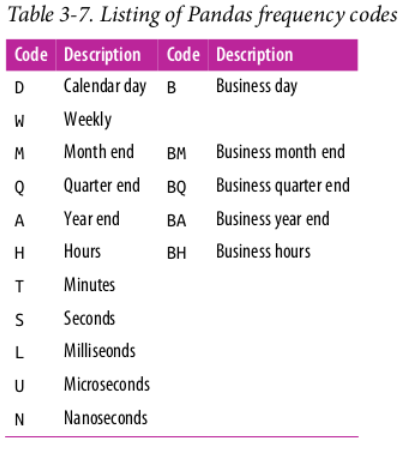

#### Resampling, Shifting, and Windowing

Pandas provides several additional time series-specific operations.

As Pandas we developed largely in financial context, it includes some very specific tools for financial data.

Let's take a look at an example. Here we load Google's closing price history.

In [309]:
!pip install --upgrade pandas-datareader

In [310]:
import pandas_datareader as pdr
import datetime

goog = pdr.DataReader('GOOG', start='2004', end='2021', data_source='yahoo')

goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000.0,1776.089966
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005


Let's use the closing price column data.

In [311]:
goog = goog['Close'] 

We will visualize this data using matplotlib.

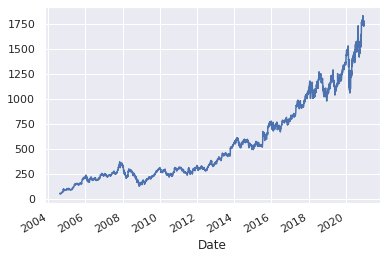

In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot()

**Resampling and converting frequencies**
One common need for time series data is resampling at a higher or lower frequency.

We can do that using the `resample()` method, or the much simpler `asfreq()` method.

The main difference between the two is:

* `resample()` is fundamentally a data aggregation
* `asfreq()` is fundamentally a data selection.

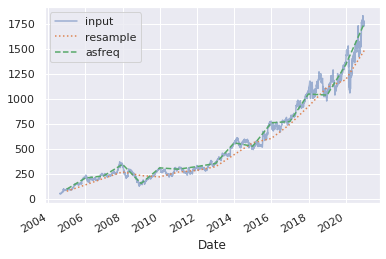

In [313]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')

Note the difference: at each point, resample reports the average of the previous year, while `asfreq` reports the value at the end of the year.

**Time-shifts**
Another common time series-specific operation is shifting of data in time.

Pandas has the following method for computing this:

* `shift()`: shifts the data
The shift is specified in multiples of frequency.

Let's select 4 years of goog data `(2010 - 2014)`and `shift()` by `365 days`.

In [314]:
goog10_14 = goog['2010':'2014']
goog10_14

Date
2010-01-04    312.204773
2010-01-05    310.829926
2010-01-06    302.994293
2010-01-07    295.940735
2010-01-08    299.885956
                 ...    
2014-12-24    527.322266
2014-12-26    532.567810
2014-12-29    528.877991
2014-12-30    528.967712
2014-12-31    524.958740
Name: Close, Length: 1258, dtype: float64

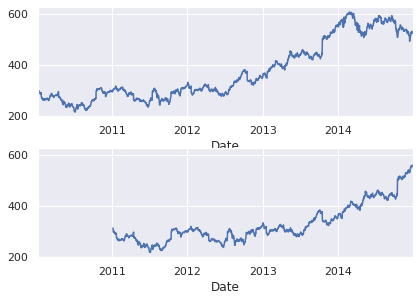

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, sharey=True)
fig.tight_layout(pad=0.6)

# apply a frequency to the data
goog10_14 = goog10_14.asfreq('D', method='pad')

goog10_14.plot(ax=ax[0]);
goog10_14.shift(365).plot(ax=ax[1]); # data shifted by 365 days to the right

Here we see that `shift(365)` shifts the data by `365 days`, pushing some of it off the end of the graph (and leaving NA values on the left end)

One common context for this type of shift is computing the differences over time.

For example, we can use shifted values to compute the one-year return on investment `(ROI)`for Google stock over the course of the dataset.

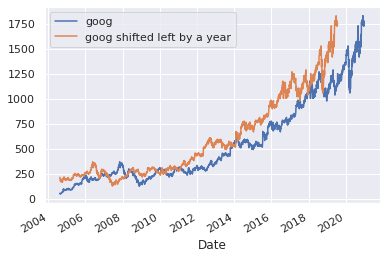

In [316]:
goog.plot();goog.shift(-365).plot();plt.legend(['goog','goog shifted left by a year']);

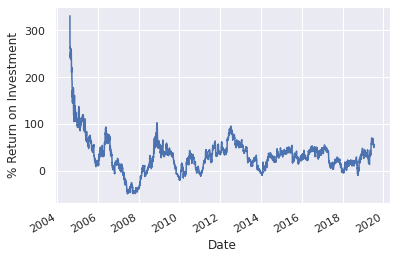

In [317]:
ROI = 100 * ((goog.shift(-365) / goog) - 1)

ROI.plot()
plt.ylabel('% Return on Investment');

This helps us see the overall trend in Google stock. We can see that the most profitable times to invest in Google have been shortly after its IPO, and in the middle of the 2009 recession.